<a href="https://colab.research.google.com/github/sainikhilrai/Deep-Learning/blob/master/autoEncoder_bayesian_range(10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [2]:
# OM SRI SAI RAM

# Descr: Basic or experiment code to perform loss reserve prediction

##############################
# Step 1 : Reading Sample Data
##############################

import numpy as np
import random
import sklearn
import os

from sklearn.preprocessing import LabelEncoder

os.environ["KERAS_BACKEND"] = "theano"
np.random.seed(7)
random.seed(7)
accident_years = np.arange(2000,2010,1)
development_years = np.arange(0,10,1)
"""
triangle = np.array(([1232,946,520,722,316,165,48,14],
                   [1469,1201,708,845, 461,235,56,18],
                   [1652,1416,959,954,605,287,69,21],
                   [1831,1634,1124,1087,725,314,79,24],
                   [2074,1919,1330,1240,756,359,91,28],
                   [2434,2263,1661,1540,909,432,109,33],
                   [2810,2108,1544,1565,924,439,111,34],
                   [3072,2614,1785,1810,1069,508,128,39]))
"""

'\ntriangle = np.array(([1232,946,520,722,316,165,48,14],\n                   [1469,1201,708,845, 461,235,56,18],\n                   [1652,1416,959,954,605,287,69,21],\n                   [1831,1634,1124,1087,725,314,79,24],\n                   [2074,1919,1330,1240,756,359,91,28],\n                   [2434,2263,1661,1540,909,432,109,33],\n                   [2810,2108,1544,1565,924,439,111,34],\n                   [3072,2614,1785,1810,1069,508,128,39]))\n'

In [0]:
triangle = np.array(([5012,3257,2638,898,1734,2642,1828,599,54,172],
                   [106,4179,1111,5270,3116,1817,-103,673,535,0],
                   [3410,5582,4881,2268,2594,3479,649,603,0,0],
                   [5655,5990,4211,5500,2159,2658,984,0,0,0],
                   [1092,8473,6271,6333,3786,255,0,0,0,0],
                   [1513,4932,5257,1233,2917,0,0,0,0,0],
                   [557,3463,6926,1368,0,0,0,0,0,0],
                   [1351,5596,6165,0,0,0,0,0,0,0],
                   [3133,2262,0,0,0,0,0,0,0,0],
                   [2063,0,0,0,0,0,0,0,0,0]))


In [5]:
triangle.shape

(10, 10)

In [6]:
print(' Accident Years',accident_years)
print(' Developement Years',development_years)
print(' Input', triangle)


 Accident Years [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]
 Developement Years [0 1 2 3 4 5 6 7 8 9]
 Input [[5012 3257 2638  898 1734 2642 1828  599   54  172]
 [ 106 4179 1111 5270 3116 1817 -103  673  535    0]
 [3410 5582 4881 2268 2594 3479  649  603    0    0]
 [5655 5990 4211 5500 2159 2658  984    0    0    0]
 [1092 8473 6271 6333 3786  255    0    0    0    0]
 [1513 4932 5257 1233 2917    0    0    0    0    0]
 [ 557 3463 6926 1368    0    0    0    0    0    0]
 [1351 5596 6165    0    0    0    0    0    0    0]
 [3133 2262    0    0    0    0    0    0    0    0]
 [2063    0    0    0    0    0    0    0    0    0]]


In [7]:
# Cum calc
C = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]):
        C[i,j] = sum(triangle[i,:j+1])

print('C',C)

C [[ 5012.  8269. 10907. 11805. 13539. 16181. 18009. 18608. 18662. 18834.]
 [  106.  4285.  5396. 10666. 13782. 15599. 15496. 16169. 16704. 16704.]
 [ 3410.  8992. 13873. 16141. 18735. 22214. 22863. 23466. 23466. 23466.]
 [ 5655. 11645. 15856. 21356. 23515. 26173. 27157. 27157. 27157. 27157.]
 [ 1092.  9565. 15836. 22169. 25955. 26210. 26210. 26210. 26210. 26210.]
 [ 1513.  6445. 11702. 12935. 15852. 15852. 15852. 15852. 15852. 15852.]
 [  557.  4020. 10946. 12314. 12314. 12314. 12314. 12314. 12314. 12314.]
 [ 1351.  6947. 13112. 13112. 13112. 13112. 13112. 13112. 13112. 13112.]
 [ 3133.  5395.  5395.  5395.  5395.  5395.  5395.  5395.  5395.  5395.]
 [ 2063.  2063.  2063.  2063.  2063.  2063.  2063.  2063.  2063.  2063.]]


In [0]:
newTriangle= np.zeros([10,10])
for i in range(triangle.shape[0]):
  for j in range(triangle.shape[1]-i):
    newTriangle[i,j]= C[i,j]



In [0]:
newTriangle

array([[ 5012.,  8269., 10907., 11805., 13539., 16181., 18009., 18608.,
        18662., 18834.],
       [  106.,  4285.,  5396., 10666., 13782., 15599., 15496., 16169.,
        16704.,     0.],
       [ 3410.,  8992., 13873., 16141., 18735., 22214., 22863., 23466.,
            0.,     0.],
       [ 5655., 11645., 15856., 21356., 23515., 26173., 27157.,     0.,
            0.,     0.],
       [ 1092.,  9565., 15836., 22169., 25955., 26210.,     0.,     0.,
            0.,     0.],
       [ 1513.,  6445., 11702., 12935., 15852.,     0.,     0.,     0.,
            0.,     0.],
       [  557.,  4020., 10946., 12314.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [ 1351.,  6947., 13112.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [ 3133.,  5395.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [ 2063.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]])

In [9]:
l_encode = LabelEncoder()
l_encode.fit(accident_years)
a_yr = l_encode.transform(accident_years)
l_encode.fit(development_years)
dev_yr = l_encode.transform(development_years)

print(a_yr)
print(dev_yr)


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [0]:
train_data = []
for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        train_data.append([a_yr[i],dev_yr[j],C[i,j]])
        
test_data = []
for i in range(1,np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i,np.shape(triangle)[1]):
        test_data.append([a_yr[i],dev_yr[j],C[i,j]])

 
#convert trainData and testData into numpyArray
#train_data = np.array(train_data)
test_data = np.array(test_data)


In [11]:
######################################################
############## code for the bootstrap  ###############
######################################################



#code for generating the other triangle


for iteratrion in range(100):
  newTriangle2= np.zeros((triangle.shape[0],triangle.shape[1]))
  for i in range(triangle.shape[0]):
    for j in range(triangle.shape[1]-i):
        newTriangle2[i,j]= newTriangle[i,j] + np.random.randint(-10,10)  #add some random value
  difference= newTriangle2-newTriangle   #take the error
  
  
  
  #get the column of the difference
  columncount=triangle.shape[1]
  for columnIndex in range(triangle.shape[1]):
    column= difference[:columncount,columnIndex]   #get the column of the error matrix
    np.random.shuffle(column)                      # shuffle the column
    newTriangle[:columncount,columnIndex]= newTriangle[:columncount,columnIndex]+ column    #get the bootstrap sample
    columncount= columncount-1
    
  #print("Bootstrap New Triangle:\n")
  print(newTriangle)
  
  """  #find the cumulative sum of new Bootstrap New Triangle
  newC = np.zeros(shape=(np.shape(triangle)[0],np.shape(triangle)[1]))
  for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(newTriangle)[1]):
        newC[i,j] = sum(newTriangle[i,:j+1])
  """

  
  
  #combine the new triangle with the already existing training set
  
  for i in range(np.shape(triangle)[0]):
    for j in range(np.shape(triangle)[1]-i):
        train_data.append([a_yr[i],dev_yr[j],newTriangle[i,j]])
  

[[ 5009.  8265. 10898. 11811. 13536. 16173. 18008. 18612. 18662. 18832.]
 [  111.  4291.  5390. 10672. 13788. 15603. 15494. 16170. 16700.     0.]
 [ 3419.  8986. 13868. 16150. 18725. 22216. 22853. 23470.     0.     0.]
 [ 5651. 11639. 15849. 21355. 23505. 26175. 27155.     0.     0.     0.]
 [ 1101.  9567. 15827. 22162. 25952. 26203.     0.     0.     0.     0.]
 [ 1504.  6435. 11696. 12928. 15845.     0.     0.     0.     0.     0.]
 [  566.  4014. 10950. 12304.     0.     0.     0.     0.     0.     0.]
 [ 1360.  6940. 13111.     0.     0.     0.     0.     0.     0.     0.]
 [ 3130.  5395.     0.     0.     0.     0.     0.     0.     0.     0.]
 [ 2060.     0.     0.     0.     0.     0.     0.     0.     0.     0.]]
[[ 5011.  8264. 10894. 11816. 13538. 16169. 18013. 18619. 18662. 18826.]
 [  108.  4293.  5391. 10674. 13785. 15604. 15494. 16175. 16695.     0.]
 [ 3423.  8985. 13874. 16150. 18720. 22223. 22851. 23462.     0.     0.]
 [ 5653. 11638. 15845. 21351. 23496. 26174. 27149.

In [12]:
train_data= np.array(train_data)
train_data.shape
#train_data[71,:]

(5555, 3)

In [0]:
##############
# define the loss function
################

def poisson_dev(y_true, y_pred):
    return 2*K.mean(y_pred - y_true -y_true*(K.log(K.clip(y_pred,K.epsilon(),None)) -K.log(K.clip(y_true,K.epsilon(),None))),axis=-1)

In [0]:
################################
# Step 3 : Build Model using Neural Networks
# Note : MSE loss used here
###############################

import keras
import keras.backend as K
from keras import regularizers
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras.callbacks import RemoteMonitor
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers



In [15]:
###################
# Auto Encoder Network Architecture #
######################

#encoder part
inputData= Input(shape=(2,))
encoded= Dense(20,activation='relu',kernel_initializer='normal')(inputData)
encoded= Dense(10,activation='relu')(encoded)
encoded= Dense(2,activation='relu')(encoded)  #latent space representation

#decoder part
decoded = Dense(10, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(2, activation='relu')(decoded)

#combine the encoder and the decoder
autoencoder = Model(inputData, decoded)

#get only the encoder part
encoderPart= Model(inputData,encoded)

adam = optimizers.Adam(lr=0.1)
autoencoder.compile(loss="mse", optimizer='adam',metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)
filepath="v5.best.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True)

#history = autoencoder.fit(x=train_data[:,:2], y=train_data[:,:2], batch_size=1, epochs=300, verbose=1, callbacks=[checkpointer,reduce_lr,early_stop], validation_split=0.3, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)
history = autoencoder.fit(x=train_data[:,:2], y=train_data[:,:2], batch_size=1, epochs=300, verbose=1, callbacks=None, validation_split=0.3, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3888 samples, validate on 1667 samples
Epoch 1/300
3888/3888 [==============================] - 9s 2ms/step - loss: 4.6765 - acc: 0.5303 - val_loss: 4.2422 - val_acc: 0.5855
Epoch 2/300
3888/3888 [==============================] - 9s 2ms/step - loss: 2.6334 - acc: 0.8040 - val_loss: 1.5140 - val_acc: 0.8374
Epoch 3/300
3888/3888 [==============================] - 8s 2ms/step - loss: 1.1625 - acc: 0.8894 - val_loss: 1.2166 - val_acc: 0.9094
Epoch 4/300
3888/3888 [==============================] - 9s 2ms/step - loss: 0.8951 - acc: 0.9120 - val_loss: 0.9383 - val_acc: 0.9460
Epoch 5/300
3888/3888 [==============================] - 8s 2ms/step - loss: 0.8088 - acc: 0.9090 - val_loss: 0.7342 - val_acc: 0.9094
Epoch 6/300
3888/3888 [==============================] - 8s 2ms/step - loss: 0.7881 - acc: 0.9115 - val_loss: 0.7355 - val_acc: 0.9094
Epoch 7/300
3888/3888 

In [0]:
#get the encoded representation of the train Data and test Data

train_data_Encoded= encoderPart.predict(train_data[:,:2])
test_data_Encoded= encoderPart.predict(test_data[:,:2])

In [17]:
train_data[0,2]

5012.0

In [18]:
train_data_Encoded[0,1]

0.0

In [0]:
#make new train data and test Data
newTrainData= []
newTestData= []
for i in range(train_data.shape[0]):
  newTrainData.append([train_data_Encoded[i,0],train_data_Encoded[i,1],train_data[i,2]])
  
for i in range(test_data.shape[0]):
  newTestData.append([test_data_Encoded[i,0],test_data_Encoded[i,1],test_data[i,2]])
  
newTrainData= np.array(newTrainData)
newTestData= np.array(newTestData)



In [20]:
newTrainData.shape

(5555, 3)

In [0]:
newTestData.shape

(28, 3)

In [0]:
newTrainData[0,]

array([   9.22684765,    4.78407955, 1232.        ])

In [0]:
#build the neural Network for prediction

neuralNetwork = Sequential()
ip_dim = 2
#model.add(Dropout(0.1, input_shape=(ip_dim,))
neuralNetwork.add(Dense(10, input_dim=ip_dim, kernel_initializer='normal', activation='relu'))
neuralNetwork.add(Dense(5, kernel_initializer='normal', activation='relu'))
#neuralNetwork.add(Dropout(0.1))
neuralNetwork.add(Dense(2, kernel_initializer='normal', activation='relu'))
#neuralNetwork.add(Dropout(0.1))
#neuralNetwork.add(Dense(10, kernel_initializer='normal', activation='relu'))
neuralNetwork.add(Dense(1, kernel_initializer='normal',activation="exponential"))
# Compile model
neuralNetwork.compile(loss=poisson_dev, optimizer='adam',metrics=['accuracy'])



In [22]:
history1 = neuralNetwork.fit(x=newTrainData[:,:ip_dim], y=newTrainData[:,ip_dim], batch_size=1, epochs=500, verbose=1, callbacks=None, validation_split=0.33, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)


Train on 3721 samples, validate on 1834 samples
Epoch 1/500
3721/3721 [==============================] - 9s 2ms/step - loss: 74912.3947 - acc: 0.0000e+00 - val_loss: 44450.4332 - val_acc: 0.0000e+00
Epoch 2/500
3721/3721 [==============================] - 8s 2ms/step - loss: 23407.7066 - acc: 0.0000e+00 - val_loss: 5456.2832 - val_acc: 0.0000e+00
Epoch 3/500
3721/3721 [==============================] - 8s 2ms/step - loss: 3808.1528 - acc: 0.0000e+00 - val_loss: 3632.1807 - val_acc: 0.0000e+00
Epoch 4/500
3721/3721 [==============================] - 7s 2ms/step - loss: 3650.1221 - acc: 0.0000e+00 - val_loss: 4405.1707 - val_acc: 0.0000e+00
Epoch 5/500
3721/3721 [==============================] - 7s 2ms/step - loss: 3674.0719 - acc: 0.0000e+00 - val_loss: 3550.0159 - val_acc: 0.0000e+00
Epoch 6/500
3721/3721 [==============================] - 7s 2ms/step - loss: 3697.7130 - acc: 0.0000e+00 - val_loss: 3632.5996 - val_acc: 0.0000e+00
Epoch 7/500
3721/3721 [==============================] 

In [23]:
###########################################
# Step 4: Model Prediction
#############################################
out = neuralNetwork.predict(newTestData[:,:2])
print(out)

[[19466.133 ]
 [24484.531 ]
 [25349.21  ]
 [30796.709 ]
 [31884.307 ]
 [33010.312 ]
 [36146.125 ]
 [38707.453 ]
 [37992.32  ]
 [37290.4   ]
 [29065.287 ]
 [34219.46  ]
 [33587.375 ]
 [32966.96  ]
 [32358.008 ]
 [23371.547 ]
 [29365.244 ]
 [29693.717 ]
 [29145.227 ]
 [28606.867 ]
 [28078.453 ]
 [14911.373 ]
 [23612.7   ]
 [26251.438 ]
 [25766.531 ]
 [25290.582 ]
 [24823.402 ]
 [24364.896 ]
 [ 7641.6733]
 [13009.02  ]
 [22148.426 ]
 [22779.494 ]
 [22358.742 ]
 [21945.74  ]
 [21540.367 ]
 [21142.46  ]
 [ 3916.1538]
 [ 6666.769 ]
 [11349.3955]
 [19127.473 ]
 [19766.76  ]
 [19401.637 ]
 [19043.256 ]
 [18691.498 ]
 [18346.236 ]]


In [0]:
#################################
# Step 5 : Reserve calculation
#################################

import matplotlib.pyplot as plt
#print(' Test Data',test_data)
#print('pred', model.predict([2,]))
#print('C',C)
true_reserve = 0
for i in range(1,np.shape(triangle)[0]):
    j = np.shape(triangle)[1]-1-i
    #print(i,j)
    #print('last known',C[i,j])
    #print(' last estimate',C[i,np.shape(triangle)[1]-1])
    true_reserve += (C[i,np.shape(triangle)[1]-1] - C[i,j])
    #print(true_reserve)
print(" True reserve",true_reserve)


 True reserve 17352.0


In [0]:
appended= np.array(list(zip(test_data,np.ravel(out))))
len(appended)

out_dict = {}
for i in range(len(appended)):
    #print(tuple(appended[i,0][:2]))
    #print(appended[i,1])
    out_dict[tuple(appended[i,0][:2])] = appended[i,1]



In [0]:
appended[0,0][:2]

array([1., 7.])

In [0]:
pred_reserve = 0
final_pred = []
actuals = []
for i in range(1,np.shape(triangle)[0]):
    j = int(np.shape(triangle)[1]-1-i)    
    #print(i,j)
    #print('last known',C[i,j])
    #print(' last pred', out_dict[(i,np.shape(triangle)[1]-1)])
    #print(' last estimate',C[i,np.shape(triangle)[1]-1])
    final_pred.append(out_dict[(i,np.shape(triangle)[1]-1)] - C[i,j])
    actuals.append(C[i,np.shape(triangle)[1]-1] - C[i,j])
    pred_reserve +=(out_dict[(i,np.shape(triangle)[1]-1)] - C[i,j])
    

In [28]:
print(" Predicted reserve",pred_reserve)
#print(' Bias',pred_reserve - true_reserve)
#print('Bias pct',(pred_reserve-true_reserve)/pred_reserve)


 Predicted reserve 97133.109375


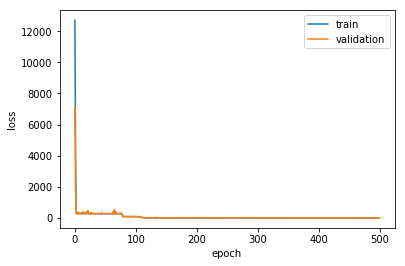

In [0]:
#ploting the loss of Neural Network
from matplotlib import pyplot

#training loss and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.xlabel('epoch')
pyplot.ylabel('loss')
pyplot.legend(['train','validation'],loc='upper right')
pyplot.show()

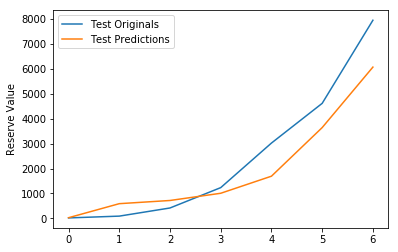

In [0]:
#plot showing predicted value vs actual value
plt.figure()
plt.plot(actuals, label = "Test Originals")
plt.plot(final_pred, label ="Test Predictions")
plt.ylabel("Reserve Value")
plt.legend()
plt.show()


In [0]:
test_data[0,]

array([1.000e+00, 7.000e+00, 4.993e+03])

In [0]:
out

array([[5001.1714],
       [6076.9854],
       [6462.7324],
       [6657.912 ],
       [7011.3906],
       [7118.674 ],
       [7211.494 ],
       [7344.077 ],
       [7456.4434],
       [7570.5435],
       [7054.5913],
       [7628.1304],
       [7810.2476],
       [7929.7544],
       [8051.0894],
       [6532.3125],
       [7462.17  ],
       [8068.845 ],
       [8306.009 ],
       [8433.101 ],
       [8562.146 ],
       [5339.2217],
       [7020.49  ],
       [7893.289 ],
       [8535.022 ],
       [8833.247 ],
       [8968.406 ],
       [9144.037 ]], dtype=float32)

In [0]:
type(test_data)
type(out)
out

numpy.ndarray

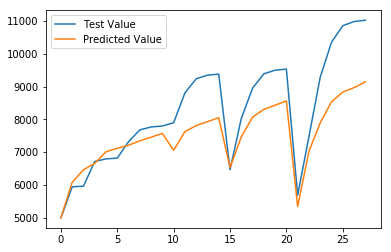

In [0]:
#plot for the predicted and the test lower triangle
plt.plot(test_data[:,2],label='Test Value')
plt.plot(out,label='Predicted Value')
plt.legend()